In [1]:
import pandas as pd
df = pd.read_csv("Downloads/car_price_prediction.csv")

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4,Automatic,Front,04-May,Left wheel,Black,4


In [4]:
# reference - https://www.kaggle.com/code/nadaemad2002/car-price-prediction?scriptVersionId=150206266&cellId=16
for col in df.columns:
    print(f'Category in {col} is :\n {df[col].unique()}\n')
    print('\\'*50)

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'


# Data Cleaning

In [5]:
df.dtypes

ID                   int64
Price                int64
Levy                object
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage             object
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
df.duplicated().sum()

313

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [10]:
df["Mileage"] = pd.to_numeric(df["Mileage"].str.replace("km",""),errors="coerce")

In [11]:
df["Levy"] = pd.to_numeric(df["Levy"].str.replace("-","0"),errors="coerce").astype('Int64')

In [12]:
df.dtypes

ID                   int64
Price                int64
Levy                 Int64
Manufacturer        object
Model               object
Prod. year           int64
Category            object
Leather interior    object
Fuel type           object
Engine volume       object
Mileage              int64
Cylinders            int64
Gear box type       object
Drive wheels        object
Doors               object
Wheel               object
Color               object
Airbags              int64
dtype: object

In [13]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4,Automatic,Front,04-May,Left wheel,Black,4


In [14]:
df.rename(columns={"Mileage":"Mileage(km)","Engine volume":"Engine_volume"},inplace=True)

In [15]:
df.query('Engine_volume.str.contains("Turbo")',engine="python")

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine_volume,Mileage(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
23,45814106,7840,0,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000,4,Manual,Front,02-Mar,Left wheel,White,0
25,45782859,20385,0,MERCEDES-BENZ,E 220,2006,Sedan,Yes,Diesel,2.2 Turbo,210000,4,Tiptronic,Rear,04-May,Left wheel,Black,8
30,44944581,15681,1288,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,2.0 Turbo,180000,6,Manual,Rear,04-May,Left wheel,White,4
34,45542380,24462,0,JEEP,Grand Cherokee,2007,Jeep,Yes,Diesel,3.0 Turbo,250000,6,Tiptronic,4x4,04-May,Left wheel,Black,10
42,45667253,20165,650,VOLKSWAGEN,Jetta,2016,Sedan,Yes,Petrol,1.4 Turbo,11200,4,Tiptronic,Front,04-May,Left wheel,Black,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19167,45799423,18817,1995,FORD,Transit,2003,Microbus,No,Diesel,2.4 Turbo,2147483647,4,Manual,Front,02-Mar,Left wheel,White,2
19170,45776725,10976,0,MERCEDES-BENZ,C 220,2001,Sedan,No,Diesel,2.2 Turbo,320000,5,Automatic,Rear,04-May,Left wheel,Silver,4
19190,45790255,24462,642,BMW,528,2012,Sedan,Yes,Petrol,2.0 Turbo,96966,4,Tiptronic,Rear,04-May,Left wheel,Black,12
19225,45794580,8781,1107,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,236000,4,Manual,Front,04-May,Left wheel,Beige,4


In [16]:
df["Turbo"]=np.where(df["Engine_volume"].str.contains("Turbo"),1,0)

In [17]:
df["Engine_volume"]=pd.to_numeric(df["Engine_volume"].str.replace("Turbo",""),errors="coerce")

In [18]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine_volume,Mileage(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,45774419,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,04-May,Left wheel,Black,4,0


In [19]:
df.dtypes

ID                    int64
Price                 int64
Levy                  Int64
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine_volume       float64
Mileage(km)           int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
Turbo                 int32
dtype: object

In [20]:
del df["ID"]

In [21]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine_volume,Mileage(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6,Automatic,4x4,04-May,Left wheel,Silver,12,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000,6,Tiptronic,4x4,04-May,Left wheel,Black,8,0
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4,Automatic,4x4,04-May,Left wheel,White,0,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,04-May,Left wheel,Black,4,0


In [22]:
df["Category"].value_counts()

Category
Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

In [23]:
jeep = df[df["Category"]=="Jeep"]
remove_jeep = np.random.choice(jeep.index, size=3000, replace=False)
df = df.drop(remove_jeep)

In [24]:
sedan = df[df["Category"]=="Sedan"]
remove_sedan = np.random.choice(sedan.index, size=6000, replace=False)
df = df.drop(remove_sedan)

In [25]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine_volume,Mileage(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,0
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,04-May,Left wheel,White,12,0
11,8781,0,FORD,Transit,1999,Microbus,No,CNG,4.0,0,8,Manual,Rear,02-Mar,Left wheel,Blue,0,0
12,3000,0,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000,4,Manual,Front,04-May,Left wheel,White,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,04-May,Left wheel,Black,4,0


In [26]:
df["Category"].value_counts()

Category
Hatchback      2799
Sedan          2600
Jeep           2378
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

Exploratory Data Analysis

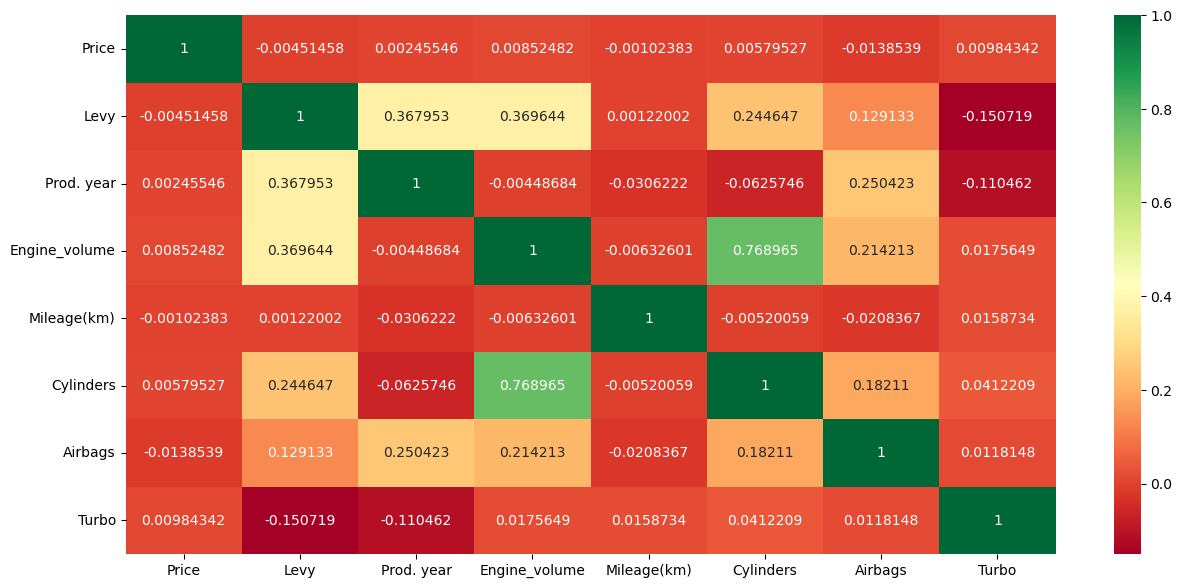

In [27]:
df_num = df.loc[:,["Price","Levy","Prod. year","Engine_volume","Mileage(km)","Cylinders","Airbags","Turbo"]]
fig,ax = plt.subplots(figsize=(15,7))
sns.heatmap(df_num.corr(),annot=True,fmt="g",cmap="RdYlGn");

In [28]:
df.loc[df["Prod. year"]>2000]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine_volume,Mileage(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,0
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,04-May,Left wheel,White,12,0
14,59464,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2.0,76000,4,Automatic,Front,04-May,Left wheel,White,4,0
23,7840,0,FORD,Transit,2001,Microbus,No,Diesel,2.0,230000,4,Manual,Front,02-Mar,Left wheel,White,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800,6,Automatic,Rear,04-May,Left wheel,Grey,12,0
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,04-May,Left wheel,Black,4,0


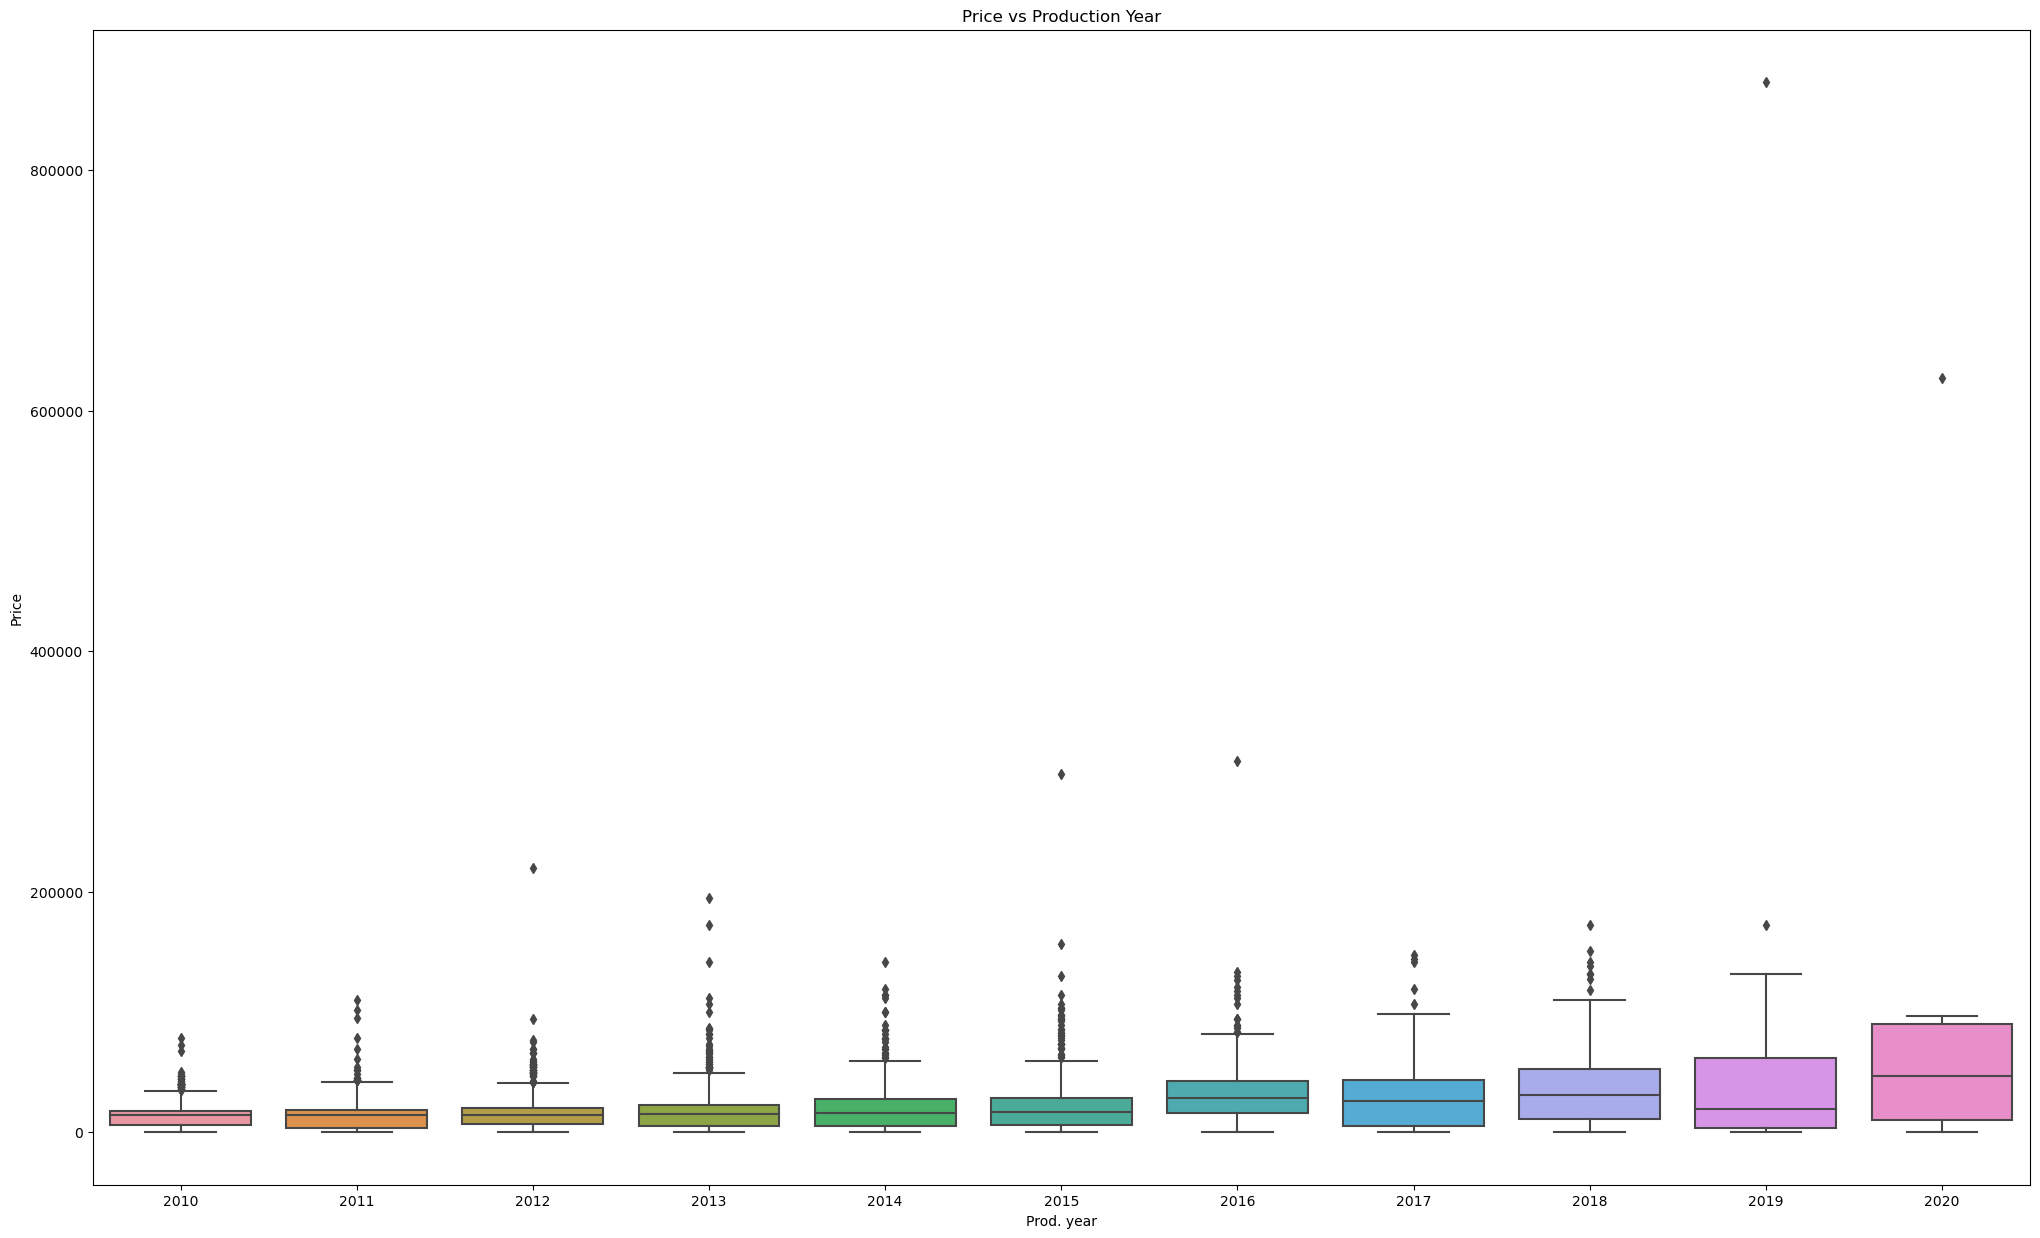

In [29]:
fig,ax=plt.subplots(figsize=(25,15))
sns.boxplot(x="Prod. year",y="Price",data=df.loc[df["Prod. year"]>2009],ax=ax)
ax.set_title("Price vs Production Year");

In [30]:
avg_price = df.groupby("Prod. year").agg({"Price":"mean"})

In [31]:
avg_price

,Price
Prod. year,
1939,171.333333
1947,150.000000
1953,7997.500000
1965,65074.000000
1973,15681.000000
1977,15681.000000
1978,1500.000000
1980,1925.000000
1982,31361.000000


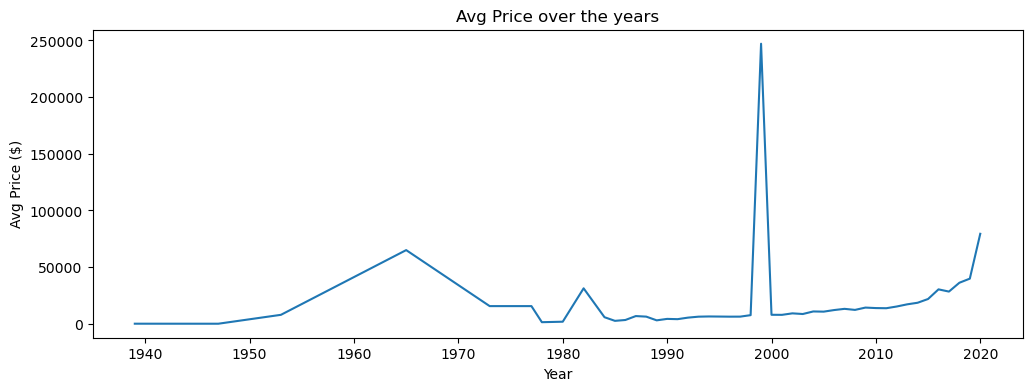

In [32]:
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(avg_price.index,avg_price["Price"])
ax.set_title("Avg Price over the years")
ax.set_xlabel("Year")
ax.set_ylabel("Avg Price ($)");

In [33]:
category_price=df.groupby("Category").agg({"Price":"mean"})

In [34]:
category_price

,Price
Category,
Cabriolet,24407.971429
Coupe,21282.356061
Goods wagon,124840.104803
Hatchback,11354.611647
Jeep,24283.327166
Limousine,11534.454545
Microbus,18538.933110
Minivan,20601.456556
Pickup,29362.392157


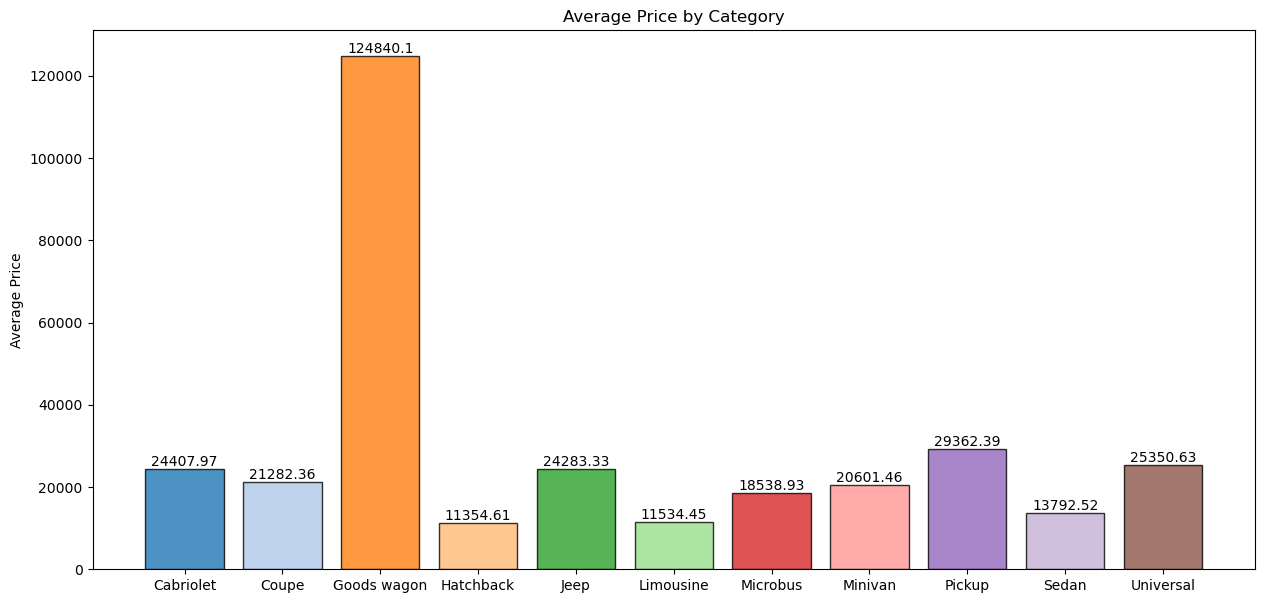

In [35]:
fig,ax=plt.subplots(figsize=(15,7))
color_pal = sns.color_palette("tab20")
colors=list(color_pal)
edgecolor = 'black'
bars=ax.bar(category_price.index,category_price["Price"],alpha=0.8,color=colors,edgecolor=edgecolor)
ax.set_ylabel("Average Price")
ax.set_title("Average Price by Category")
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

In [36]:
car = pd.DataFrame(df["Manufacturer"].value_counts())

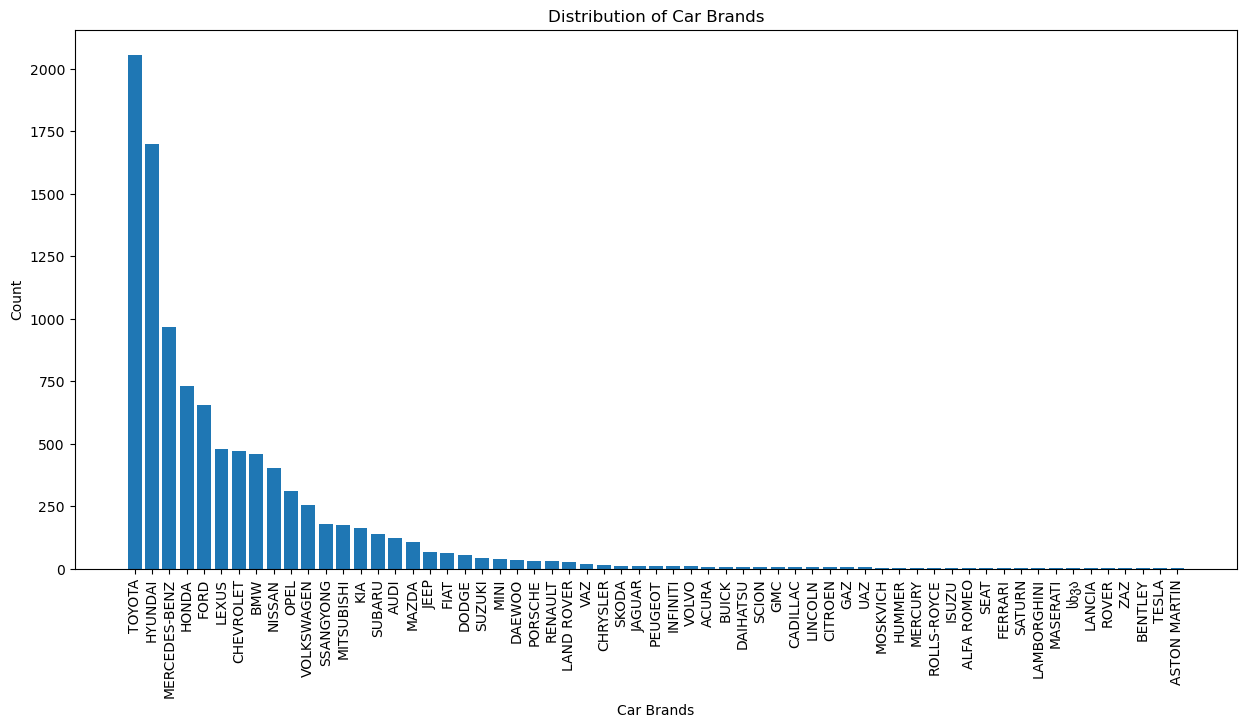

In [37]:
fig,ax = plt.subplots(figsize=(15,7))
brand = ax.bar(car.index,car["count"])
plt.xlabel("Car Brands")
plt.ylabel("Count")
plt.xticks(rotation=90)
ax.set_title("Distribution of Car Brands");

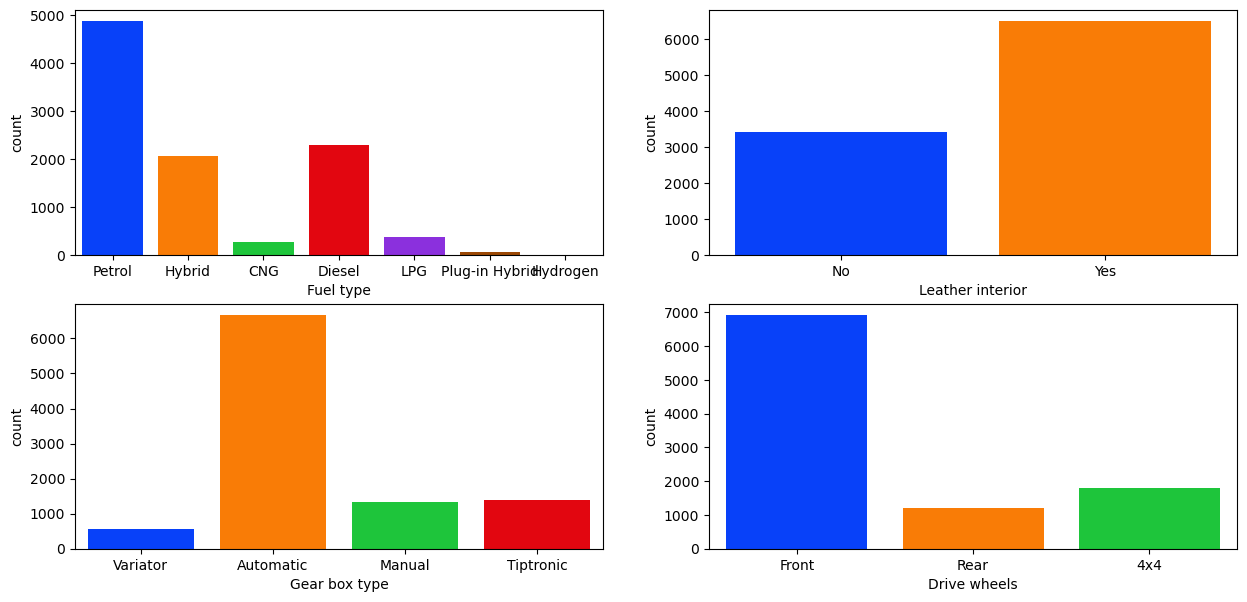

In [38]:
fig,ax = plt.subplots(2,2,figsize=(15,7))
ax = ax.ravel()
list=["Fuel type","Leather interior","Gear box type","Drive wheels"]
for i,col in enumerate(list):
    sns.countplot(x=df[col], data=df, palette='bright', saturation=0.95,ax=ax[i])

In [39]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine_volume,Mileage(km),Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4,Variator,Front,04-May,Right-hand drive,Black,2,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4,Automatic,Front,04-May,Left wheel,Silver,4,0
6,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909,4,Automatic,Front,04-May,Left wheel,White,12,0
11,8781,0,FORD,Transit,1999,Microbus,No,CNG,4.0,0,8,Manual,Rear,02-Mar,Left wheel,Blue,0,0
12,3000,0,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000,4,Manual,Front,04-May,Left wheel,White,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000,4,Manual,Rear,02-Mar,Left wheel,Silver,5,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4,Tiptronic,Front,04-May,Left wheel,Red,8,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365,4,Automatic,Front,04-May,Left wheel,Grey,4,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2.0,51258,4,Automatic,Front,04-May,Left wheel,Black,4,0


In [40]:
df["Category"].value_counts()

Category
Hatchback      2799
Sedan          2600
Jeep           2378
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: count, dtype: int64

# Data Pre processing

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [42]:
numerical_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="mean")),("scaler",StandardScaler())])
categorical_transformer = Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),("onehot",OneHotEncoder(handle_unknown="ignore",sparse=False))])


In [43]:
categorical_columns = df.select_dtypes(include=["object"]).columns

In [44]:
categorical_columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object')

In [45]:
numerical_columns = df.select_dtypes(include=["int64","Int64","float64","int32"]).columns

In [46]:
numerical_columns

Index(['Price', 'Levy', 'Prod. year', 'Engine_volume', 'Mileage(km)',
       'Cylinders', 'Airbags', 'Turbo'],
      dtype='object')

In [47]:
numerical_columns = numerical_columns.drop("Price")

In [48]:
preprocessor=ColumnTransformer(transformers=[("num",numerical_transformer,numerical_columns),("cat",categorical_transformer,categorical_columns)],remainder="passthrough")

In [49]:
pipeline = Pipeline(steps=[("preprocessor",preprocessor)])

In [50]:
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [51]:
categorical_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [52]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Levy', 'Prod. year', 'Engine_volume', 'Mileage(km)', 'Cylinders',
       'Airbags', 'Turbo'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color'],
      dtype='object'))]))])

In [53]:
X=df.drop("Price",axis=1)
y=np.log(df["Price"]) #Normalized

In [54]:
X_preprocessed=pipeline.fit_transform(X)

C:\Users\Chandru\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [55]:
X_preprocessed

array([[-1.01600342, -0.74740846, -1.0597396 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.23915275,  0.62676658, -1.0597396 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3095198 , -0.06032094, -0.47784912, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.44015612, -0.06032094, -0.24509293, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.22745769, -0.57563658, -0.24509293, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29558526,  0.28322282,  0.22041946, ...,  0.        ,
         1.        ,  0.        ]])

# Machine Learning

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_preprocessed,y,test_size=0.2,random_state=42)

In [59]:
models={"LinearRegression":LinearRegression(),"RandomForest":RandomForestRegressor(random_state=42),"XGBoost":XGBRegressor(random_state=42)}
cv = KFold(n_splits=3,shuffle=True,random_state=42)

In [59]:
for model_name,model in models.items():
    if model_name=="LinearRegression":
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        params={}
    elif model_name=="RandomForest":
        param_grid={"n_estimators":[100,200,500],"max_depth":[None,10,30],"min_samples_split":[2,5,10]}
        grid_search=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
        grid_search.fit(X_train,y_train)
        model=grid_search.best_estimator_
        y_pred=model.predict(X_test)
        params=grid_search.best_params_
    else:
        param_grid={"n_estimators":[100,200,500],"max_depth":[3,6,10],"learning_rate":[0.01,0.1,0.3]}
        grid_search=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
        grid_search.fit(X_train,y_train)
        model=grid_search.best_estimator_
        y_pred=model.predict(X_test)
        params=grid_search.best_params_
    
    rmse=sqrt(mean_squared_error(y_test,y_pred))
    print(f"Model : {model_name}")
    print(f"Best Params : {params}")
    print(f"Best RMSE : {rmse}")
        
    

Model : LinearRegression
Best Params : {}
Best RMSE : 278383930043.47034
Model : RandomForest
Best Params : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE : 1.1002998482274549
Model : XGBoost
Best Params : {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}
Best RMSE : 1.1110284827213048


In [61]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42,max_iter=10000,n_iter_no_change=3)
mlp_param = {"hidden_layer_sizes":[(10,),(10,10),(10,10,10),(25)],"activation":["tanh","relu"],"solver":["sgd","adam"],"learning_rate":["constant","invscaling","adaptive"]}
grid_search=GridSearchCV(mlp,mlp_param,cv=3,scoring="neg_mean_squared_error",n_jobs=-1,verbose=1)
grid_search.fit(X_train,y_train)
model=grid_search.best_estimator_
params=grid_search.best_params_
y_pred=model.predict(X_test)
rmse=sqrt(mean_squared_error(y_test,y_pred))
print("Model : MLPRegressor")
print(f"Best Params: {params}")
print(f"Best RMSE : {rmse}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Model : MLPRegressor
Best Params: {'activation': 'tanh', 'hidden_layer_sizes': (10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best RMSE : 1.2142322125618894


In [60]:
from sklearn.decomposition import PCA
pca=PCA()
X_pca_pre=pca.fit_transform(X_preprocessed)
cum_var=np.cumsum(pca.explained_variance_ratio_)
n_component=np.argmax(cum_var>=0.95)+1
pca=PCA(n_components=n_component)
pca_pipeline=Pipeline(steps=[("preprocessor",preprocessor),("pca",pca)])
X_pca=pca_pipeline.fit_transform(X)


C:\Users\Chandru\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(X_pca,y,test_size=0.2,random_state=42)

In [64]:
for model_name,model in models.items():
    if model_name=="LinearRegression":
        model.fit(X_train_pca,y_train_pca)
        y_pred_pca=model.predict(X_test_pca)
        params={}
    elif model_name=="RandomForest":
        param_grid={"n_estimators":[100,200,500],"max_depth":[None,10,30],"min_samples_split":[2,5,10]}
        grid_search=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
        grid_search.fit(X_train_pca,y_train_pca)
        model=grid_search.best_estimator_
        y_pred_pca=model.predict(X_test_pca)
        params=grid_search.best_params_
    else:
        param_grid={"n_estimators":[100,200,500],"max_depth":[3,6,10],"learning_rate":[0.01,0.1,0.3]}
        grid_search=GridSearchCV(model,param_grid,cv=cv,scoring="neg_mean_squared_error",n_jobs=-1)
        grid_search.fit(X_train_pca,y_train_pca)
        model=grid_search.best_estimator_
        y_pred_pca=model.predict(X_test_pca)
        params=grid_search.best_params_
    
    rmse=sqrt(mean_squared_error(y_test_pca,y_pred_pca))
    print(f"Model : {model_name}")
    print(f"Best Params : {params}")
    print(f"Best RMSE : {rmse}")

Model : LinearRegression
Best Params : {}
Best RMSE : 1.3522119287748857
Model : RandomForest
Best Params : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best RMSE : 1.0452482718614071
Model : XGBoost
Best Params : {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best RMSE : 1.0597347430976105


In [63]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42,max_iter=10000,n_iter_no_change=3)
mlp_param = {"hidden_layer_sizes":[(10,),(10,10),(10,10,10),(25)],"activation":["tanh","relu"],"solver":["sgd","adam"],"learning_rate":["constant","invscaling","adaptive"]}
grid_search=GridSearchCV(mlp,mlp_param,cv=3,scoring="neg_mean_squared_error",n_jobs=-1,verbose=1)
grid_search.fit(X_train_pca,y_train_pca)
model=grid_search.best_estimator_
params=grid_search.best_params_
y_pred_pca=model.predict(X_test_pca)
rmse=sqrt(mean_squared_error(y_test_pca,y_pred_pca))
print("Model : MLPRegressor")
print(f"Best Params: {params}")
print(f"Best RMSE : {rmse}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Model : MLPRegressor
Best Params: {'activation': 'tanh', 'hidden_layer_sizes': (10, 10, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
Best RMSE : 1.145573553903045


In [86]:
model = RandomForestRegressor(random_state=42,max_depth=None,min_samples_split=5,n_estimators=500) # our best model
model.fit(X_train_pca,y_train_pca)
y_pred_pca=model.predict(X_test_pca)

In [89]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_pca,y_pred_pca)
rmse=sqrt(mean_squared_error(y_test_pca,y_pred_pca))
print("R2 Score:", r2)
print("RMSE:" , rmse)

R2 Score: 0.5495967349074286
RMSE: 1.0452482718614071


In [90]:
y_test_original=np.exp(y_test_pca)

In [91]:
y_test_original

10144    30784.0
996       9095.0
8331     77775.0
16208    31047.0
18479    12231.0
          ...   
11164    48403.0
12037    23521.0
6565      8781.0
6286      8154.0
11614     1550.0
Name: Price, Length: 1985, dtype: float64

In [92]:
y_pred_original = np.exp(y_pred_pca)

In [93]:
test=pd.DataFrame(y_test_original)

In [94]:
test["Predicted"] = y_pred_original

In [95]:
test["Difference"] = y_test_original - y_pred_original

In [96]:
test

,Price,Predicted,Difference
10144,30784.0,31341.753856,-557.753856
996,9095.0,4907.521159,4187.478841
8331,77775.0,53025.616510,24749.383490
16208,31047.0,17868.591730,13178.408270
18479,12231.0,9605.930208,2625.069792
...,...,...,...
11164,48403.0,42290.414045,6112.585955
12037,23521.0,16374.721161,7146.278839
6565,8781.0,7187.622502,1593.377498
6286,8154.0,8220.466426,-66.466426
